# Daria Bromot - FS500047

## Decision Trees and Random Forests in Python

### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

### Get the Data

In [26]:
df = pd.read_csv('kyphosis.csv')

In [27]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


This data-frame contains the following columns:

- Kyphosis: A factor with levels absent present indicating if a kyphosis was present after the operation.
- Age: In months.
- Number: The number of vertebrae involved.
- Start: The number of the first vertebra operated on.

### EDA

We'll just check out a simple pairplot for this small dataset.

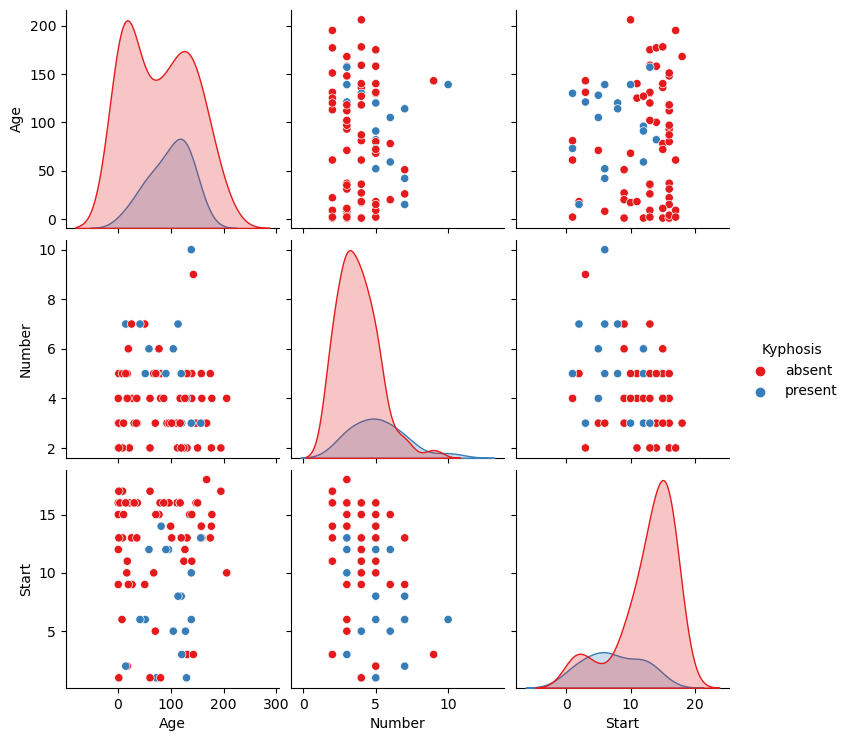

In [28]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

C:\Users\bromotdi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number', ylabel='Density'>

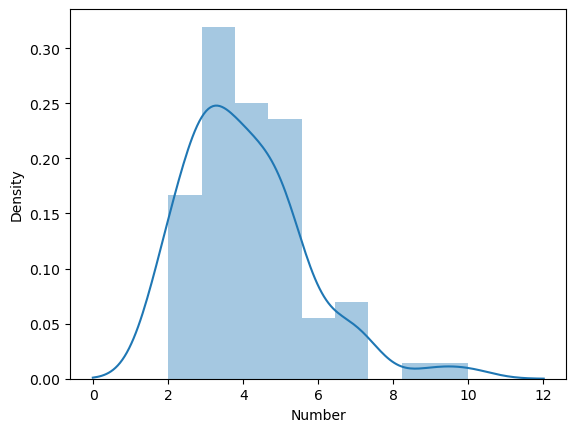

In [59]:
sns.distplot(df.Number)

<AxesSubplot:xlabel='Number', ylabel='count'>

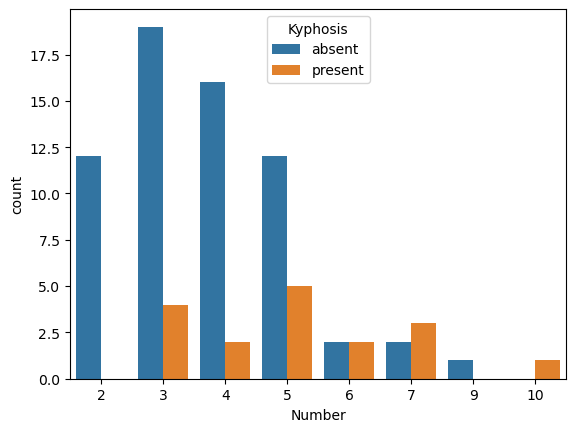

In [60]:
sns.countplot(data = df, x = 'Number', hue = 'Kyphosis')

### Train Test Split

Let's split up the data into a training set and a test set!

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees

We'll start just by training a single decision tree.

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation 

Let's evaluate our decision tree.

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.83      0.86        18
     present       0.62      0.71      0.67         7

    accuracy                           0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25



In [37]:
print(confusion_matrix(y_test,predictions))

[[15  3]
 [ 2  5]]


### Make predictions and check accuracy

In [40]:
from sklearn import metrics
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',accuracy )

Accuracy Score: 0.8


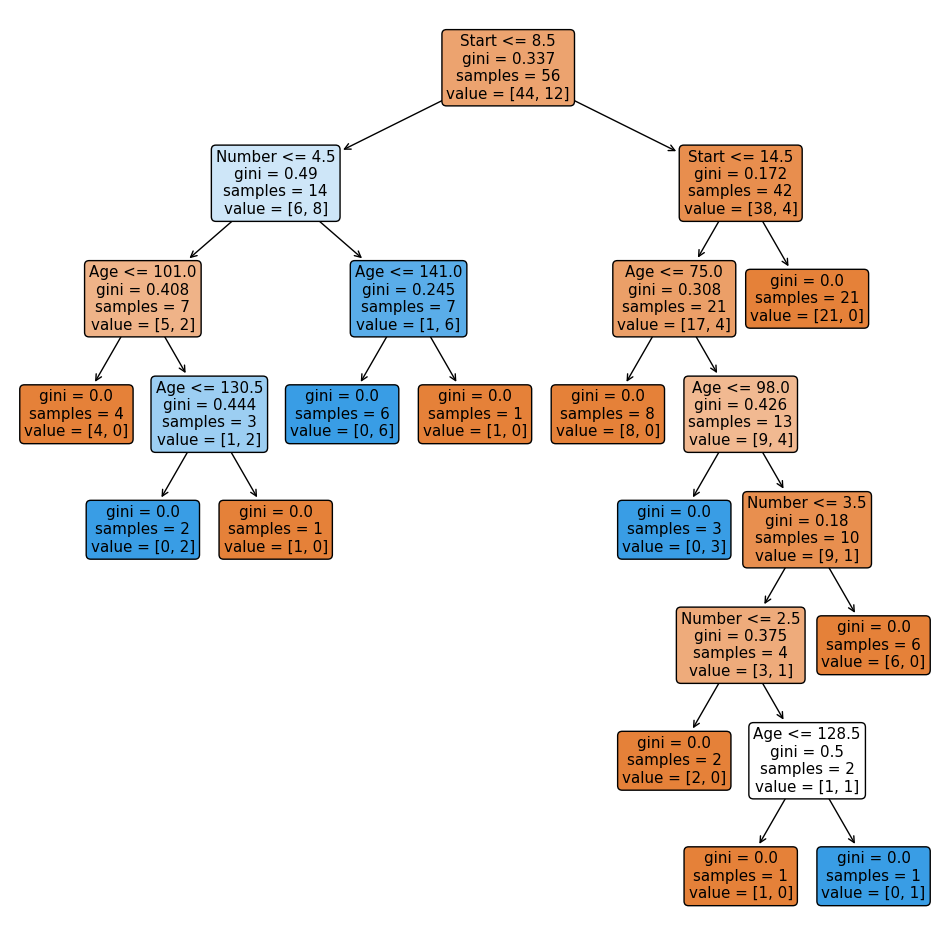

|--- Start <= 8.50
|   |--- Number <= 4.50
|   |   |--- Age <= 101.00
|   |   |   |--- class: absent
|   |   |--- Age >  101.00
|   |   |   |--- Age <= 130.50
|   |   |   |   |--- class: present
|   |   |   |--- Age >  130.50
|   |   |   |   |--- class: absent
|   |--- Number >  4.50
|   |   |--- Age <= 141.00
|   |   |   |--- class: present
|   |   |--- Age >  141.00
|   |   |   |--- class: absent
|--- Start >  8.50
|   |--- Start <= 14.50
|   |   |--- Age <= 75.00
|   |   |   |--- class: absent
|   |   |--- Age >  75.00
|   |   |   |--- Age <= 98.00
|   |   |   |   |--- class: present
|   |   |   |--- Age >  98.00
|   |   |   |   |--- Number <= 3.50
|   |   |   |   |   |--- Number <= 2.50
|   |   |   |   |   |   |--- class: absent
|   |   |   |   |   |--- Number >  2.50
|   |   |   |   |   |   |--- Age <= 128.50
|   |   |   |   |   |   |   |--- class: absent
|   |   |   |   |   |   |--- Age >  128.50
|   |   |   |   |   |   |   |--- class: present
|   |   |   |   |--- Number >  3.50


In [48]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_text

features = list(df.columns[1:])
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dtree, feature_names=features, filled=True, rounded=True, ax=ax)

plt.show()

tree_text = export_text(dtree, feature_names=features)
print(tree_text)


Based on the provided text representation of the decision tree, it is not immediately clear whether the tree is balanced or not. The balance of a decision tree refers to the distribution of samples across the tree's nodes.

To determine the balance of the tree, we would need additional information such as the number of samples in each class at each node or the total number of samples in the dataset used to train the tree.

In [50]:
def print_node_class_distribution(tree_model, tree, node_index=0, depth=0):
    indent = "  " * depth
    class_counts = tree.value[node_index].squeeze()
    total_samples = class_counts.sum()
    class_labels = tree_model.classes_
    
    print(f"{indent}Class Distribution: {class_counts} (Total: {total_samples})")
    
    if tree.children_left[node_index] != tree.children_right[node_index]:
        print_node_class_distribution(tree_model, tree, tree.children_left[node_index], depth + 1)
        print_node_class_distribution(tree_model, tree, tree.children_right[node_index], depth + 1)

# Assuming `dtree` is the trained decision tree model
print_node_class_distribution(dtree, dtree.tree_)


Class Distribution: [44. 12.] (Total: 56.0)
  Class Distribution: [6. 8.] (Total: 14.0)
    Class Distribution: [5. 2.] (Total: 7.0)
      Class Distribution: [4. 0.] (Total: 4.0)
      Class Distribution: [1. 2.] (Total: 3.0)
        Class Distribution: [0. 2.] (Total: 2.0)
        Class Distribution: [1. 0.] (Total: 1.0)
    Class Distribution: [1. 6.] (Total: 7.0)
      Class Distribution: [0. 6.] (Total: 6.0)
      Class Distribution: [1. 0.] (Total: 1.0)
  Class Distribution: [38.  4.] (Total: 42.0)
    Class Distribution: [17.  4.] (Total: 21.0)
      Class Distribution: [8. 0.] (Total: 8.0)
      Class Distribution: [9. 4.] (Total: 13.0)
        Class Distribution: [0. 3.] (Total: 3.0)
        Class Distribution: [9. 1.] (Total: 10.0)
          Class Distribution: [3. 1.] (Total: 4.0)
            Class Distribution: [2. 0.] (Total: 2.0)
            Class Distribution: [1. 1.] (Total: 2.0)
              Class Distribution: [1. 0.] (Total: 1.0)
              Class Distribution: [0

Looking at the class distributions in the provided tree, we can see that the distribution varies at different nodes. For example:
- At the root node (depth 0), we have [44, 12] which indicates an imbalance with one class having a significantly higher number of samples than the other.
- At other nodes, such as [6, 8], [5, 2], [1, 6], [38, 4], and [17, 4], we still observe imbalances between the classes.

These imbalances suggest that the tree is not strictly balanced. It's worth noting that an imbalanced tree doesn't necessarily indicate poor performance or lack of usefulness. The tree may still provide accurate predictions for the majority class or perform well in the given context. The evaluation of the tree's performance should be based on appropriate metrics and considerations specific to the problem being addressed.

### Random Forests

Now let's compare the decision tree model to a random forest.

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [62]:
rfc_pred = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 3  2]]


In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [65]:
accuracy = metrics.accuracy_score(y_test,rfc_pred)
print('Accuracy Score:',accuracy )

Accuracy Score: 0.8


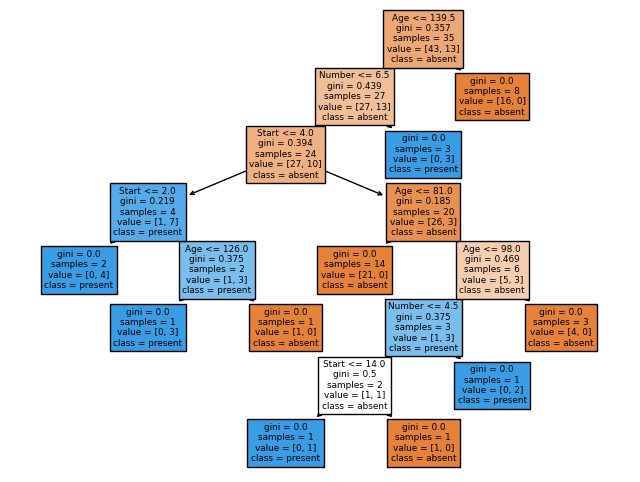

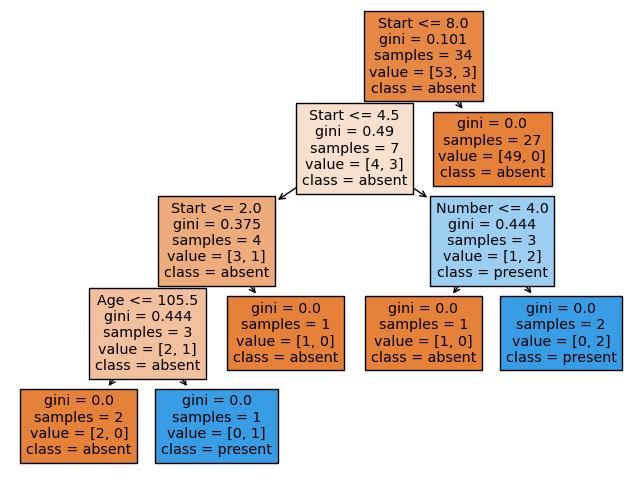

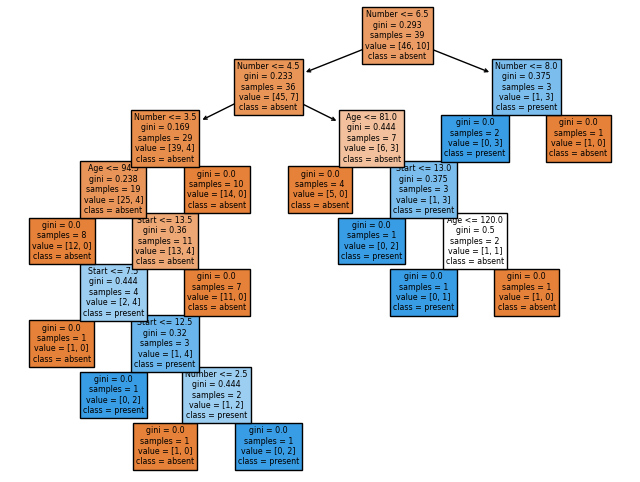

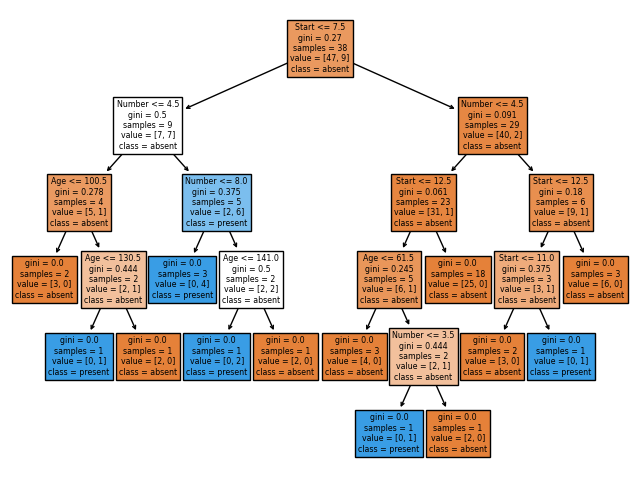

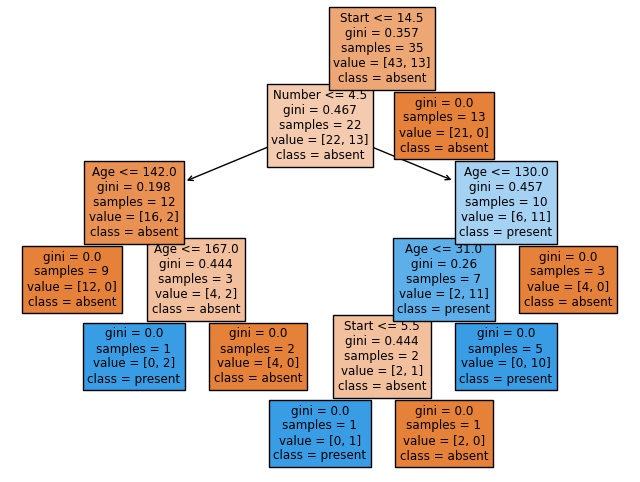

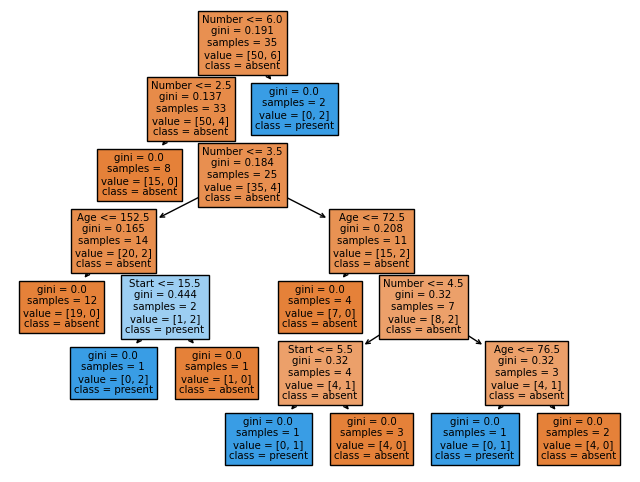

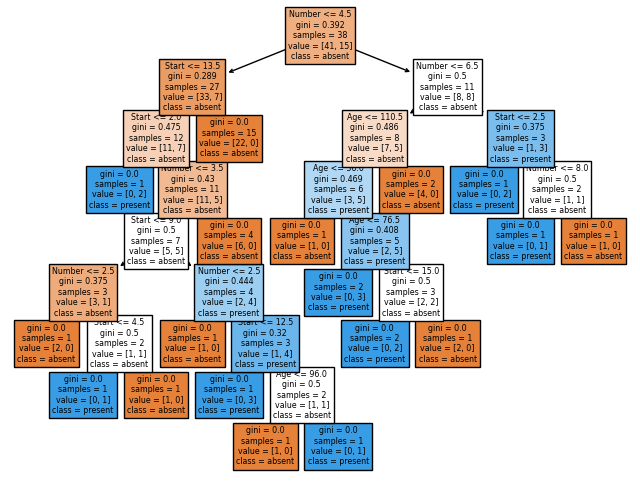

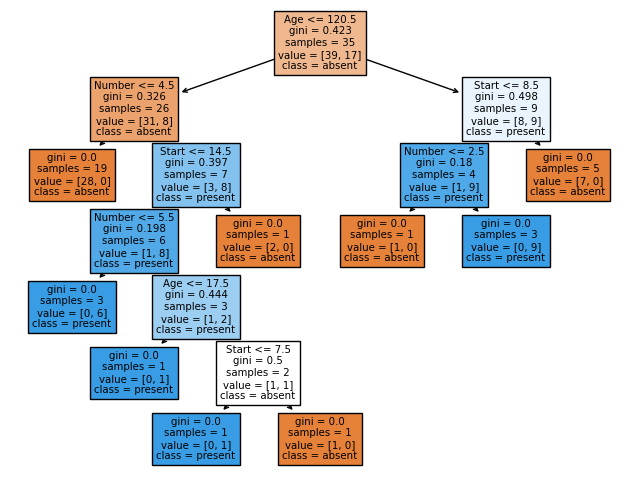

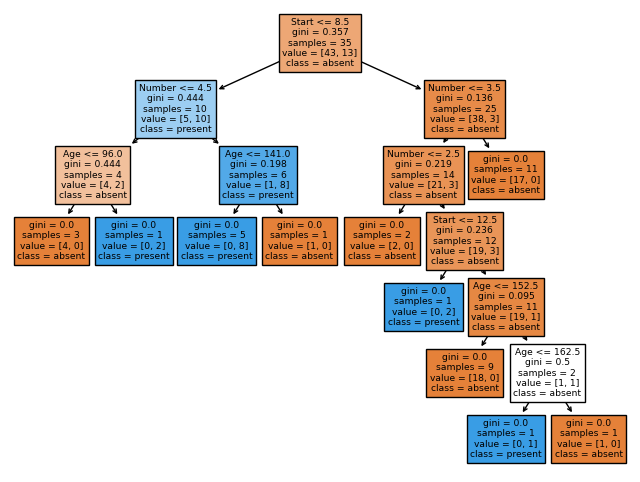

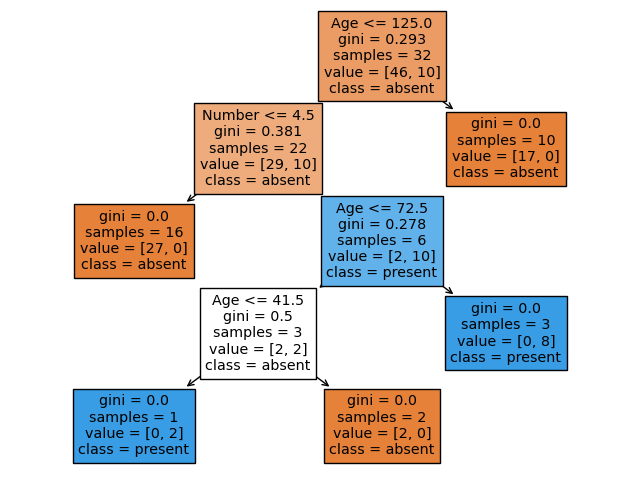

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Plot each decision tree within the random forest
for i, tree in enumerate(rfc.estimators_):
    plt.figure(figsize=(8, 6))
    plt.title(f'Tree {i+1}')
    plot_tree(tree, feature_names=X.columns, class_names=['absent', 'present'], filled=True)
    plt.show()